In [57]:
import folium
from folium.plugins import MarkerCluster
import alphashape


# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïãú ÏûÑÌè¨Ìä∏
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

import geopandas as gpd
from shapely.geometry import MultiPoint, LineString
from shapely.ops import unary_union, polygonize

In [58]:
# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')  # Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Ïª¨ÎüºÏù¥ ÏûàÏñ¥ÎèÑ Ïò§Î•ò Î∞©ÏßÄ
df = df.dropna(axis=0)

# BuildingArea 0Í∞í Ï†úÍ±∞
df = df[df['BuildingArea'] > 0.1]

# ÏõêÌï´ Ïù∏ÏΩîÎî©
train_data = pd.get_dummies(df, dtype='float')

# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÌäπÏÑ± Î∂ÑÎ¶¨
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

# ÏúÑÎèÑ, Í≤ΩÎèÑÏùò Ïú†ÎãàÌÅ¨Ìïú Ï°∞Ìï© Í∞ÄÏ†∏Ïò§Í∏∞
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values


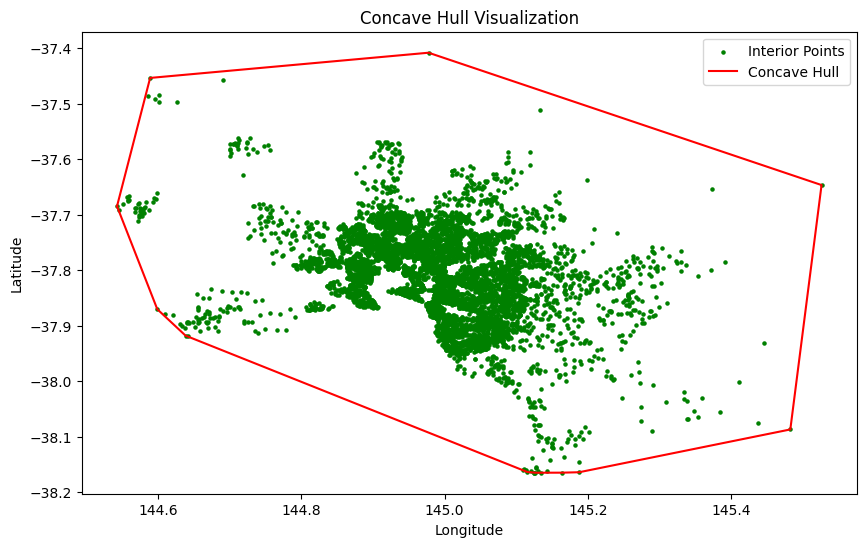

In [14]:
# Concave Hull ÏÉùÏÑ±
points = MultiPoint(lat_lon_unique)

# Convex HullÏùò Ïô∏Í≥ΩÏÑ†ÏùÑ LineStringÏúºÎ°ú Î≥ÄÌôò
convex_hull_line = LineString(points.convex_hull.exterior.coords)

# Convex HullÏùÑ Í∏∞Î∞òÏúºÎ°ú Concave Hull ÏÉùÏÑ±
#concave_hull = unary_union(polygonize([convex_hull_line]))
concave_hull = unary_union(polygonize([convex_hull_line]))

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

# ÎÇ¥Î∂Ä Îç∞Ïù¥ÌÑ∞(Ï¥àÎ°ùÏÉâ)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Concave Hull Ïô∏Í≥ΩÏÑ†(Îπ®Í∞ÑÏÉâ)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]
    
    # Ï¢åÌëúÎ•º Î∂ÑÎ¶¨ÌïòÏó¨ ÌîåÎ°Ø
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.plot(hull_lons, hull_lats, 'r-', linewidth=1.5, label="Concave Hull")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concave Hull Visualization")
plt.legend()
plt.show()


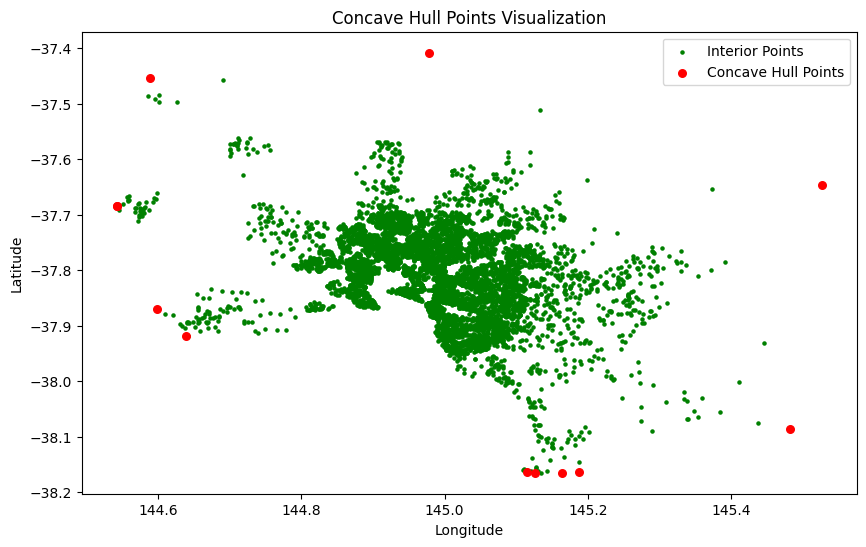

In [2]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ Îã§Ïãú Î°úÎìú
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import MultiPoint, LineString
from shapely.ops import unary_union, polygonize

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')
df = df.dropna(axis=0)

# BuildingArea 0Í∞í Ï†úÍ±∞
df = df[df['BuildingArea'] > 0.1]

# ÏõêÌï´ Ïù∏ÏΩîÎî©
train_data = pd.get_dummies(df, dtype='float')

# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÌäπÏÑ± Î∂ÑÎ¶¨
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)

# ÏúÑÎèÑ, Í≤ΩÎèÑÏùò Ïú†ÎãàÌÅ¨Ìïú Ï°∞Ìï© Í∞ÄÏ†∏Ïò§Í∏∞
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values

# Concave Hull ÏÉùÏÑ±
points = MultiPoint(lat_lon_unique)

# Convex HullÏùò Ïô∏Í≥ΩÏÑ†ÏùÑ LineStringÏúºÎ°ú Î≥ÄÌôò
convex_hull_line = LineString(points.convex_hull.exterior.coords)

# Convex HullÏùÑ Í∏∞Î∞òÏúºÎ°ú Concave Hull ÏÉùÏÑ±
concave_hull = unary_union(list(polygonize([convex_hull_line])))

# ÏãúÍ∞ÅÌôî (Concave HullÏùÑ Ï†êÏúºÎ°ú ÌëúÏãú)
plt.figure(figsize=(10, 6))

# ÎÇ¥Î∂Ä Îç∞Ïù¥ÌÑ∞(Ï¥àÎ°ùÏÉâ)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Concave Hull Ïô∏Í≥ΩÏÑ† Ï†ê(Îπ®Í∞ÑÏÉâ)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]
    
    # Concave Hull Ïô∏Í≥Ω Ï†ê ÌîåÎ°Ø
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.scatter(hull_lons, hull_lats, c='red', s=30, label="Concave Hull Points")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Concave Hull Points Visualization")
plt.legend()
plt.show()


In [65]:
df_concave_hull = pd.read_csv("/data/ephemeral/home/Jeongseon/optimized_solutions_with_concave_hull.csv")
df_concave_hull.head()


index  Lattitude_optimized  Longtitude_optimized  Predicted_Price
0      0           145.239258            -37.942285        811578.52
1      1           145.282792            -37.953913        811578.52
2      3           145.295229            -37.900771        501390.00
3      6           145.189704            -38.139274        501390.00
4     11           145.396720            -37.897069        811578.52

In [ ]:
df_concave_hull

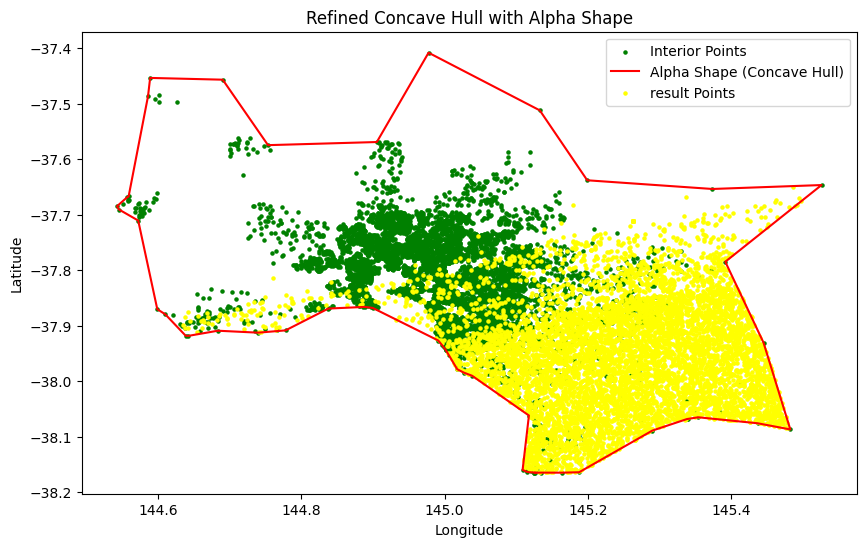

In [74]:
# ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alphashape
import geopandas as gpd
from shapely.geometry import MultiPoint, Polygon

# Îç∞Ïù¥ÌÑ∞ Îã§Ïãú Î°úÎìú
file_path = "/data/ephemeral/home/Jeongseon/melb_split.csv"
df = pd.read_csv(file_path)

# Î∂àÌïÑÏöîÌïú Ïª¨Îüº Ï†úÍ±∞
drop_tables = ['Suburb', 'Address', 'Rooms', 'Method', 'SellerG', 'Date', 'Distance', 'Postcode',
               'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'YearBuilt', 'CouncilArea',
               'Regionname', 'Propertycount', 'Split']
df = df.drop(drop_tables, axis=1, errors='ignore')
df = df.dropna(axis=0)

# BuildingArea 0Í∞í Ï†úÍ±∞
df = df[df['BuildingArea'] > 0.1]

# ÏõêÌï´ Ïù∏ÏΩîÎî©
train_data = pd.get_dummies(df, dtype='float')

# ÌÉÄÍ≤ü Î≥ÄÏàòÏôÄ ÌäπÏÑ± Î∂ÑÎ¶¨
y_train = train_data['Price']
X_train = train_data.drop(['Price'], axis=1)


# ÏúÑÎèÑ, Í≤ΩÎèÑÏùò Ïú†ÎãàÌÅ¨Ìïú Ï°∞Ìï© Í∞ÄÏ†∏Ïò§Í∏∞
lat_lon_unique = X_train[['Lattitude', 'Longtitude']].drop_duplicates().values

# üîπ Alpha ShapeÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ Concave Hull ÏÉùÏÑ± (Îçî ÏÑ∏Î∞ÄÌïú Ïô∏Í≥ΩÏÑ†)
alpha_value = 9  # Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù Îçî ÏÑ∏Î∞ÄÌïú Îã§Í∞ÅÌòïÏù¥ Îê®
concave_hull = alphashape.alphashape(lat_lon_unique, alpha_value) #Ïù¥Í±¥ Í∑∏ÎÉ• Í∑∏Î¶ºÏûÑ

#ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))

# ÎÇ¥Î∂Ä Îç∞Ïù¥ÌÑ∞(Ï¥àÎ°ùÏÉâ)
plt.scatter(X_train['Longtitude'], X_train['Lattitude'], c='green', s=5, label="Interior Points")

# Alpha Shape Ïô∏Í≥ΩÏÑ†(ÌååÎûÄÏÉâ)
if concave_hull.geom_type == "Polygon":
    concave_hull_coords = list(concave_hull.exterior.coords)
    concave_hull_coords = [(lon, lat) for lon, lat in concave_hull_coords]

    # Ï¢åÌëúÎ•º Î∂ÑÎ¶¨ÌïòÏó¨ ÌîåÎ°Ø
    hull_lats, hull_lons = zip(*concave_hull_coords)
    plt.plot(hull_lons, hull_lats, '-r', label="Alpha Shape (Concave Hull)")
    #plt.scatter(hull_lons, hull_lats, c='red', s=30, label="Alpha Shape (Concave Hull)")

##Í≤∞Í≥º Ï∞çÍ∏∞
plt.scatter(df_concave_hull['Lattitude_optimized'], df_concave_hull['Longtitude_optimized'], c='yellow', s=5, label="result Points")

# Í∑∏ÎûòÌîÑ ÏÑ§Ï†ï
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Refined Concave Hull with Alpha Shape")
plt.legend()
plt.show()


In [56]:
concave_hull_coords

[(-38.16492, 145.12656),
 (-38.16475, 145.1345),
 (-38.16483, 145.16383000000005),
 (-38.16404, 145.18781),
 (-38.08902, 145.29006),
 (-38.0683, 145.33833),
 (-38.06508, 145.35416999999995),
 (-38.07583, 145.43698),
 (-38.08699, 145.48273),
 (-37.93064, 145.4453),
 (-37.78495, 145.3919),
 (-37.64685, 145.52635),
 (-37.65391, 145.37389),
 (-37.63826, 145.1991),
 (-37.51232, 145.13282),
 (-37.40853, 144.97749),
 (-37.56937, 144.90524),
 (-37.57499, 144.75329),
 (-37.45709, 144.68999),
 (-37.45392, 144.58864),
 (-37.48701, 144.58567),
 (-37.66745, 144.55857),
 (-37.66869000000001, 144.55666000000005),
 (-37.68503, 144.54237),
 (-37.69104, 144.54532),
 (-37.71077, 144.57198),
 (-37.87047000000001, 144.59864),
 (-37.87959, 144.60977),
 (-37.91807, 144.63816),
 (-37.91859, 144.64143),
 (-37.90918, 144.68325),
 (-37.91269000000001, 144.73946),
 (-37.90858, 144.77771),
 (-37.8693, 144.8375),
 (-37.8663, 144.8883),
 (-37.8681, 144.8994),
 (-37.9268, 144.991),
 (-37.93464, 144.99601),
 (-37.944,

In [29]:
concave_hull_coords[0][0]

-38.16492

In [30]:
import folium

# ÏßÄÎèÑ Ï§ëÏã¨ Ï¢åÌëú ÏÑ§Ï†ï (Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑† ÏúÑÏπò ÏÇ¨Ïö©)
center_lat = X_train["Lattitude"].mean()
center_lon = X_train["Longtitude"].mean()

# Folium ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)


# ÎÇ¥Î∂Ä Îç∞Ïù¥ÌÑ∞ Ï†ê Ï∂îÍ∞Ä (Ï¥àÎ°ùÏÉâ Ï†ê)
for i in range(len(X_train)):
    folium.CircleMarker(
        location=[X_train.iloc[i]["Lattitude"], X_train.iloc[i]["Longtitude"]],
        radius=2,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(m)

# Alpha Shape Ïô∏Í≥ΩÏÑ† Ï¢åÌëú Ï∂îÍ∞Ä (Îπ®Í∞ÑÏÉâ Ï†ê)
for i in range(len(concave_hull_coords)):
    folium.CircleMarker(
        location=[concave_hull_coords[i][0], concave_hull_coords[i][1]],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.8,
        popup=f"Convex Hull Point {i}"
    ).add_to(m)


# ÏßÄÎèÑ Ï†ÄÏû•
map_path = "/data/ephemeral/home/Jeongseon/melb_alpha_shape_map_7.html"
m.save(map_path)

# ÏÉùÏÑ±Îêú ÏßÄÎèÑ ÌååÏùº Í≤ΩÎ°ú Ï∂úÎ†•
map_path


'/data/ephemeral/home/Jeongseon/melb_alpha_shape_map_7.html'